# Initial Condition

In [105]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as plt

In [78]:
# netcdf file path
path_T = "/albedo/home/maschr005/data/woa23_B5C2_t06_04.nc"
# load dataset
ds = xr.open_dataset(path_T, decode_cf=False)
# extract objective mean
T_an = ds.t_an

In [ ]:
# crop to region of interest
T_an_reg = T_an.sel(lat = slice(-63,-55), lon = slice(0,8))
T_an_reg

<xarray.DataArray 't_an' (time: 1, depth: 57, lat: 32, lon: 32)> Size: 233kB
[58368 values with dtype=float32]
Coordinates:
  * time     (time) float32 4B 41.5
  * depth    (depth) float32 228B 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03
  * lat      (lat) float32 128B -62.88 -62.62 -62.38 ... -55.62 -55.38 -55.12
  * lon      (lon) float32 128B 0.125 0.375 0.625 0.875 ... 7.375 7.625 7.875
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    coordinates:    time lat lon depth
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius
    _FillValue:     9.96921e+36

In [113]:
# select chosen location
T_an_loc = T_an.sel(lat = -58.5, lon = 5.5, method = "nearest")
T_an_loc

<xarray.DataArray 't_an' (time: 1, depth: 57)> Size: 228B
[57 values with dtype=float32]
Coordinates:
  * time     (time) float32 4B 41.5
  * depth    (depth) float32 228B 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03
    lat      float32 4B -58.38
    lon      float32 4B 5.625
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    coordinates:    time lat lon depth
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius
    _FillValue:     9.96921e+36

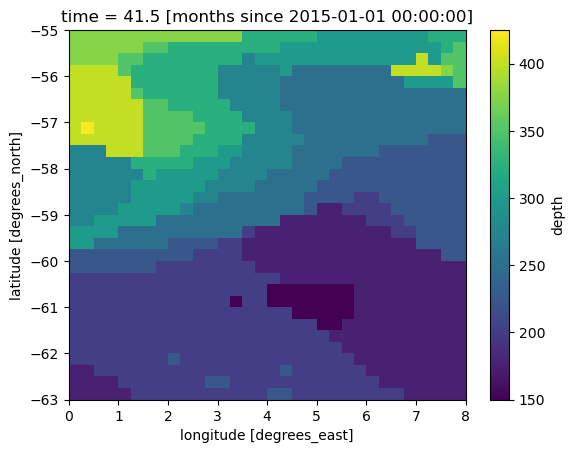

In [ ]:
# find depth of temperature maximum
depth_Tmax_loc = T_an_loc.idxmax(dim = "depth", keep_attrs=False)
depth_Tmax_reg = T_an_reg.idxmax(dim = "depth", keep_attrs=False)
depth_Tmax_reg.plot(label = "test")

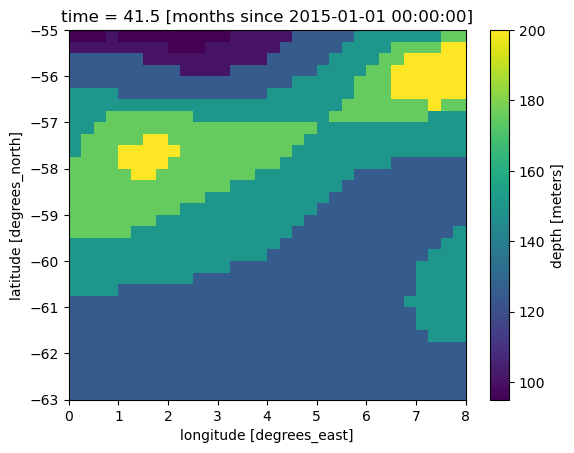

In [144]:
# find top of CDW
cdw_minT = 0
cdw_depths = T_an_reg.depth.where(T_an_reg>cdw_minT)
cdw_depth_min = cdw_depths.min(dim = "depth")
cdw_depth_min.plot()